## Update Twiss Parameters

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from elements import *
from beamline import Beamline
from beam import Bunch

In [3]:
import tables
tables.file._open_files.close_all()

In [4]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [5]:
fodo_list = [qf, d1, qd, d1, m1]

In [6]:
fodo = Beamline("fodo", fodo_list)

In [7]:
fodo.get_num_beamline_elements()

5

In [8]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   qd quadrupole  0.400 -1.200  5.800
   d1      drift  5.000  0.000 10.800
   m1     marker  0.000  0.000 10.800


In [9]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [10]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [11]:
bunch.twiss_x

[-1.5, 10, 9.973641162053365e-06]

In [12]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.973641162053365e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0111782559984921e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [13]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    9.97364   10.11178
         1         d1      drift    5.00000    5.40000       9994/     10000    9.97681   10.06772
         2         qd quadrupole    0.40000    5.80000       9328/     10000    9.88579    8.52634
         3         d1      drift    5.00000   10.80000       8926/     10000    8.75333    8.53186
         4         m1     marker    0.00000   10.80000       8926/     10000    8.75333    8.53186


In [14]:
bunch.print_bunch_properties()

number of macro particles : 8926
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 8.75333212823544e-06 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 8.531858362779362e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


In [15]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [16]:
bunch.print_bunch_properties()

number of macro particles : 8926
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 8.75333212823544e-06 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 8.531858362779362e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


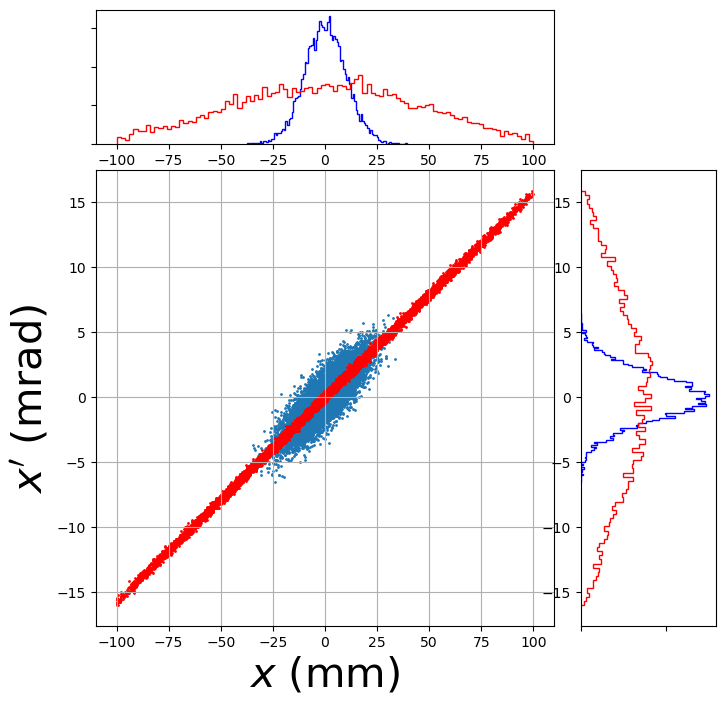

In [17]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

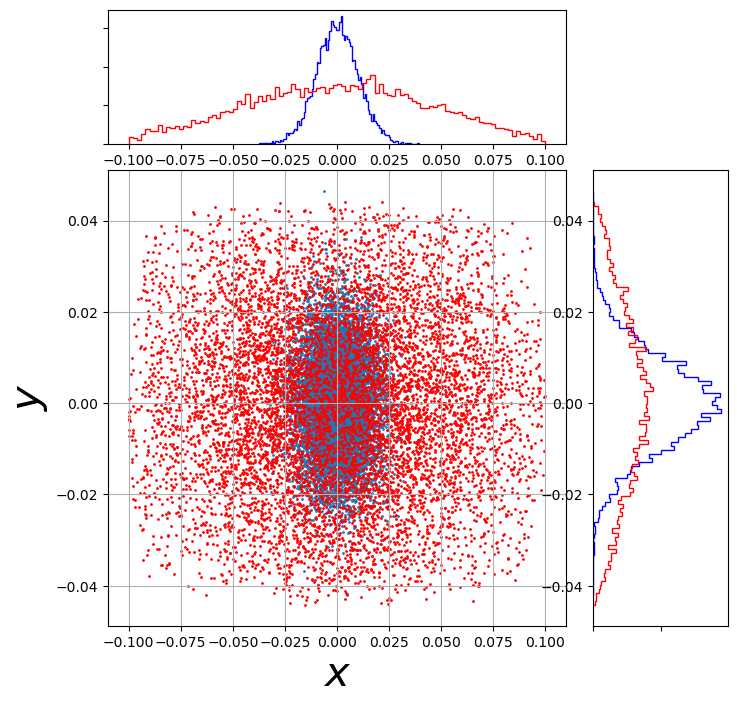

In [18]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Diagnostics

### Particle Diagnostics

In [19]:
import tables
import numpy as np
import os
from matplotlib import pyplot as plt

In [20]:
from elements import *
from beamline import Beamline
from beam import Bunch
from utils import diagnostics

In [21]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [22]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [23]:
if os.path.exists("particle.h5"):
    os.remove("particle.h5")

In [24]:
pdiagnostics = diagnostics.Particle_diagnostics("particle.h5")

In [25]:
pdiagnostics.save_particle_diagnostics(bunch.particle)

In [26]:
h5file = tables.open_file("particle.h5")

In [27]:
h5file.root.particle

/particle (Group) 'particle data'
  children := ['beta' (Array), 'charge' (Array), 'energy' (Array), 'gamma' (Array), 'mass' (Array), 'momentum' (Array), 'species' (Array)]

In [28]:
for i in h5file.root.particle:
    if i.name == "species":
        print ("%10s %10s" % (i.name, i.read()[0].decode('ASCII')))
    else:
        print ("%10s %10.5f" % (i.name, i.read()))

      beta    0.99882
    charge   -1.00000
    energy   10.00000
     gamma   20.56951
      mass    0.51100
  momentum    9.98694
   species   electron


In [29]:
h5file.close()

### Bunch Diagnostics

In [30]:
if os.path.exists("bunch.h5"):
    os.remove("bunch.h5")

In [31]:
bdiagnostics = diagnostics.Bunch_diagnostics("bunch.h5")

In [32]:
bdiagnostics.save_bunch_diagnostics(bunch)

In [33]:
h5file = tables.open_file("bunch.h5")

In [34]:
h5file.root

/ (RootGroup) 'Bunch Data'
  children := ['diagnostics' (Group), 'twiss' (Group), 'particles' (Array)]

In [35]:
h5file.root.particles.read()

array([[-6.50528931e-03, -1.79145427e-03,  4.23462071e-03, ...,
         4.57079713e-03, -6.84943661e-03,  1.14417281e-03],
       [-8.78428049e-05, -5.45456665e-04,  8.20507065e-04, ...,
         3.07720708e-04, -1.24291999e-03, -1.33564920e-03],
       [-1.96766418e-02,  2.53721137e-03, -3.24381242e-03, ...,
        -5.50444191e-03, -4.20834126e-04, -1.04472256e-03],
       [ 3.04001360e-03, -2.27306688e-04,  2.28479925e-04, ...,
         1.14149472e-03, -2.20152472e-04,  1.74450619e-04]])

In [36]:
h5file.root.diagnostics

/diagnostics (Group) 'Bunch diagnostics data'
  children := ['num_particles' (Array), 'std_x' (Array), 'std_xp' (Array), 'std_y' (Array), 'std_yp' (Array)]

In [37]:
for i in h5file.root.diagnostics:
    print ("%12s %10.5f" % (i.name, i.read()))

num_particles 10000.00000
       std_x    0.00998
      std_xp    0.00181
       std_y    0.01007
      std_yp    0.00181


In [38]:
h5file.root.twiss

/twiss (Group) 'Twiss data'
  children := ['alpha_x' (Array), 'alpha_y' (Array), 'beta_x' (Array), 'beta_y' (Array), 'emit_x' (Array), 'emit_y' (Array)]

In [39]:
for i in h5file.root.twiss:
    print ("%12s %10.5f" % (i.name, i.read()))

     alpha_x   -1.50000
     alpha_y    1.50000
      beta_x   10.00000
      beta_y   10.00000
      emit_x    0.00001
      emit_y    0.00001


In [40]:
h5file.close()

## Beamline Diagnostics

In [41]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt
from utils import diagnostics
import os
from tables import *

In [42]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [43]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y, seed=24289)

In [44]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [45]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [46]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [47]:
fodo = Beamline("fodo", fodo_list)

In [48]:
bldiagnostics = diagnostics.Beamline_diagnostics("beamline.h5")

In [49]:
bldiagnostics

In [50]:
bldiagnostics.save_bunch_diagnostics(bunch)

In [51]:
h5file = open_file("beamline.h5")

In [52]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [53]:
h5file.root.beamline.s

/beamline/s (EArray(1,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [54]:
for i in h5file.root.beamline.s:
    print (i)

0.0


In [55]:
h5file.close()

### Beamline Test

In [56]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y, seed=24289)

In [57]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [58]:
fodo2 = Beamline("fodo", fodo_list, True)

In [59]:
fodo2.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    9.92719    9.96645
         1         d1      drift    5.00000    5.40000      10000/     10000    9.92719    9.96645
         2         b1      sbend    1.50000    6.90000       9977/     10000    9.93004    9.85972
         3         d1      drift    5.00000   11.90000       9456/     10000    9.80662    8.65205
         4         qd quadrupole    0.40000   12.30000       9449/     10000    9.78093    8.64632
         5         d1      drift    5.00000   17.30000       5744/     10000    4.94465    7.64323
         6         b1      sbend    1.50000   18.80000       4014/     10000    4.32701    5.47890
         7         d1      drift    5.00000   23.80000       1842/     10000    3.68106    2.65961
         8         m1     marker    0.00000   23.80000       1842/     10000    3.68106    2.65961


In [60]:
h5file = open_file("beamline.h5")

In [61]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [62]:
h5file.root.beamline.s

/beamline/s (EArray(11,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [63]:
for i in h5file.root.beamline.s:
    print (i)

0.0
0.0
0.4
5.4
6.9
11.9
12.3
17.3
18.8
23.8
23.8


In [64]:
for i in h5file.root.twiss.emit_x:
    print (i)

9.927187738405508e-06
9.927187738405508e-06
9.927187738405513e-06
9.927187738405508e-06
9.930035355780349e-06
9.806619670932387e-06
9.780931822425667e-06
4.944646451208724e-06
4.32700920965287e-06
3.68106073996283e-06
3.68106073996283e-06


In [65]:
for i in h5file.root.twiss.beta_x:
    print (i)

10.0
10.0
9.300724614618339
7.055530318067579
15.763887749415067
58.12781715086643
75.24321923724224
1001.2668133387202
1292.3593278285514
1707.3766328751396
1707.3766328751396


In [66]:
h5file.root.twiss.beta_x

/twiss/beta_x (EArray(11,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [67]:
h5file.close()